In [1]:
import time
import requests
import pandas as pd
import numpy as np
import enchant
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df

,Unnamed: 0,text,iphone_subreddit
0,0,Please help me understand this SIM lock scenario.,1
1,1,What iPhone should I get for under $800?,1
2,2,Spotlight Not Working,1
3,3,Battery replacement,1
4,4,I accidentally messaged two people at once in ...,1
...,...,...,...
19995,19995,"Vivo IQoo U1 Price In India November 2020, Rea...",0
19996,19996,Got a phone from my dad that needs HELP!,0
19997,19997,Mine Bitcoin on the go Mining on mobile device...,0
19998,19998,Razr 5G,0


In [4]:
df = df.drop(columns='Unnamed: 0')

In [5]:
df

,text,iphone_subreddit
0,Please help me understand this SIM lock scenario.,1
1,What iPhone should I get for under $800?,1
2,Spotlight Not Working,1
3,Battery replacement,1
4,I accidentally messaged two people at once in ...,1
...,...,...
19995,"Vivo IQoo U1 Price In India November 2020, Rea...",0
19996,Got a phone from my dad that needs HELP!,0
19997,Mine Bitcoin on the go Mining on mobile device...,0
19998,Razr 5G,0


In [51]:
# A:

value_list = []
for value in df['text']:
    value_list.append(value.strip().split('.'))

value_list
val_list_final = []
for value in value_list:
    val_set = []
    for val in value:
        if len(val) == 0:
            continue
        else:
            val_set.append(val.strip())
    val_list_final.append(val_set)

val_list_final
     

[['Please help me understand this SIM lock scenario'],
 ['What iPhone should I get for under $800?'],
 ['Spotlight Not Working'],
 ['Battery replacement'],
 ['I accidentally messaged two people at once in iMessage and a group was created',
  'Is there any way to delete the group?'],
 ['100% after one year and heavy usage',
  'Is that normal or my battery monitor doesn’t work as it should? - iPhone 11 Pro Max'],
 ['Simple Magsafe car mount, no charging, no fuss, Strong magnets, sleek look and inexpensive',
  'FINALLY'],
 ['100% after one year and heavy usage',
  'Is that normal or my battery monitor doesn’t work as it should? - iPhone 11 Pro Max'],
 ["If you got the annoying Calendar notifications virus - that's how to clean your phone",
  'Thank me later'],
 ['Do you keep Scene Detection in the camera settings on or off?'],
 ['Help: Storage being taken up by ‘system’ and ‘other’ (Explanation in comments)'],
 ['how do i install an older version app'],
 ['Renders show a possible iPhone 1

In [73]:
analyzer = SentimentIntensityAnalyzer()
vader_list = []
for value in val_list_final:
    vaders = []
    for val in value:
        vader = analyzer.polarity_scores(val)
        vaders.append(vader)
    vader_list.append(vaders)

vader_list
df['vader'] = vader_list    

In [74]:
df['vader']

0        [{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'com...
1        [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
2        [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
3        [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
4        [{'neg': 0.146, 'neu': 0.732, 'pos': 0.122, 'c...
                               ...                        
19995    [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
19996    [{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'com...
19997    [{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compo...
19998    [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
19999    [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...
Name: vader, Length: 20000, dtype: object

In [75]:
df['vader_compound'] = [value[0]['compound'] for value in df['vader']]

In [124]:
df['vader_compound']

0        0.6124
1        0.0000
2        0.0000
3        0.0000
4       -0.1027
          ...  
19995    0.0000
19996    0.5754
19997    0.3164
19998    0.0000
19999    0.0000
Name: vader_compound, Length: 20000, dtype: float64

In [77]:
df

,text,iphone_subreddit,vader,vader_compound
0,Please help me understand this SIM lock scenario.,1,"[{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'com...",0.6124
1,What iPhone should I get for under $800?,1,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
2,Spotlight Not Working,1,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
3,Battery replacement,1,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
4,I accidentally messaged two people at once in ...,1,"[{'neg': 0.146, 'neu': 0.732, 'pos': 0.122, 'c...",-0.1027
...,...,...,...,...
19995,"Vivo IQoo U1 Price In India November 2020, Rea...",0,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000
19996,Got a phone from my dad that needs HELP!,0,"[{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'com...",0.5754
19997,Mine Bitcoin on the go Mining on mobile device...,0,"[{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compo...",0.3164
19998,Razr 5G,0,"[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compoun...",0.0000


In [78]:
df['vader'] = [value[0] for value in df['vader']]

In [79]:
df

,text,iphone_subreddit,vader,vader_compound
0,Please help me understand this SIM lock scenario.,1,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.6124
1,What iPhone should I get for under $800?,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,Spotlight Not Working,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Battery replacement,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,I accidentally messaged two people at once in ...,1,"{'neg': 0.146, 'neu': 0.732, 'pos': 0.122, 'co...",-0.1027
...,...,...,...,...
19995,"Vivo IQoo U1 Price In India November 2020, Rea...",0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
19996,Got a phone from my dad that needs HELP!,0,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...",0.5754
19997,Mine Bitcoin on the go Mining on mobile device...,0,"{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compou...",0.3164
19998,Razr 5G,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [122]:
print(df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('camera')].sum()[2])

print(df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('photo')].sum()[2])

print(df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('pixel')].sum()[2])

print(df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('pic')].sum()[2])

23.403799999999997
3.7866
2.2231
8.3088


<ipython-input-122-6c36c5a0f3d8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('camera')].sum()[2])
<ipython-input-122-6c36c5a0f3d8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('photo')].sum()[2])
<ipython-input-122-6c36c5a0f3d8>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('pixel')].sum()[2])
<ipython-input-122-6c36c5a0f3d8>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('pic')].sum()[2])


7.0455000000000005
9.5108
-0.9372999999999999


<ipython-input-163-beda1e0afdce>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('camera')].sum()[2])
<ipython-input-163-beda1e0afdce>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('photo')].sum()[2])
<ipython-input-163-beda1e0afdce>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('pixel')].sum()[2])
<ipython-input-163-beda1e0afdce>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('pic')]['vader_compound'])


(array([ 5., 11.,  6.,  5., 46.,  6.,  7.,  4.,  3.,  6.]),
 array([-0.7712 , -0.60369, -0.43618, -0.26867, -0.10116,  0.06635,
         0.23386,  0.40137,  0.56888,  0.73639,  0.9039 ]),
 <BarContainer object of 10 artists>)

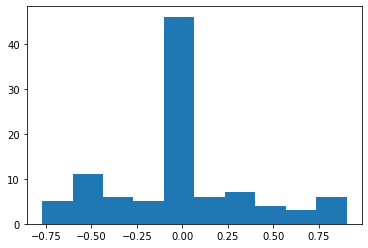

In [163]:
print(df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('camera')].sum()[2])

print(df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('photo')].sum()[2])

print(df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('pixel')].sum()[2])

plt.hist(df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('pic')]['vader_compound'])

In [146]:
print('android app compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('app')].sum()[2])

print('iphone app compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('app')].sum()[2])

android app compound sentiment sum: 104.7513
iphone app compound sentiment sum: 62.1493


<ipython-input-146-3a51b770594f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('android app compound sentiment sum:', df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('app')].sum()[2])
<ipython-input-146-3a51b770594f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('iphone app compound sentiment sum:', df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('app')].sum()[2])


In [144]:
print('android games sentiment sum:', df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('games')].sum()[2])

print('iphone games sentiment sum:', df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('games')].sum()[2])

android games sentiment sum: 12.3984
iphone games sentiment sum: 3.5725


<ipython-input-144-08f25c01dc52>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('android games sentiment sum:', df.loc[df['iphone_subreddit'] == 0][df['text'].str.contains('games')].sum()[2])
<ipython-input-144-08f25c01dc52>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('iphone games sentiment sum:', df.loc[df['iphone_subreddit'] == 1][df['text'].str.contains('games')].sum()[2])


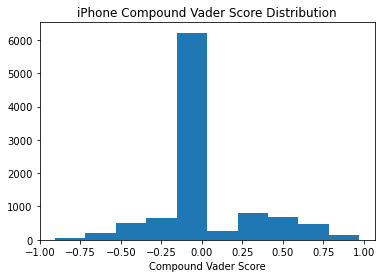

In [167]:
plt.hist(df.loc[df['iphone_subreddit'] == 1]['vader_compound'])
plt.title('iPhone Compound Vader Score Distribution')
plt.xlabel('Compound Vader Score');

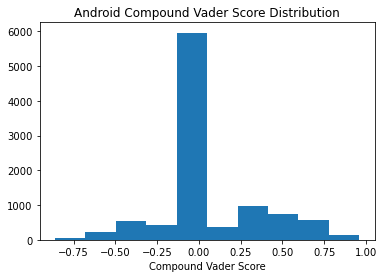

In [168]:
plt.hist(df.loc[df['iphone_subreddit'] == 0]['vader_compound']);
plt.title('Android Compound Vader Score Distribution')
plt.xlabel('Compound Vader Score');